# Clustering: Individual Assignment

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")


In [2]:
import os

In [3]:
print(os.__file__)

C:\Users\niranja.dhavan\Anaconda3\lib\os.py


In [4]:
pwd

'C:\\Users\\niranja.dhavan\\Desktop\\Data Mining\\Individual Assignment'

## 1) Read the data and do exploratory data analysis. Describe the data briefly.

In [5]:
df = pd.read_csv('bank_marketing_part1_Data.csv')
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


Data Dictionary for Market Segmentation

The following is the explanation of the dataframe loaded in the previous step.


1. spending: Amount spent by the customer per month (in 1000s)

2. advance_payments: Amount paid by the customer in advance by cash (in 100s)

3. probability_of_full_payment: Probability of payment done in full by the customer to the bank

4. current_balance: Balance amount left in the account to make purchases (in 1000s)

5. credit_limit: Limit of the amount in credit card (10000s)

6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [6]:
df.tail(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
203,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.shape

(210, 7)

In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
duplicate = df[df.duplicated()] 
duplicate

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [12]:
from pylab import rcParams

C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\niranja.dhavan\Anaconda3\lib\

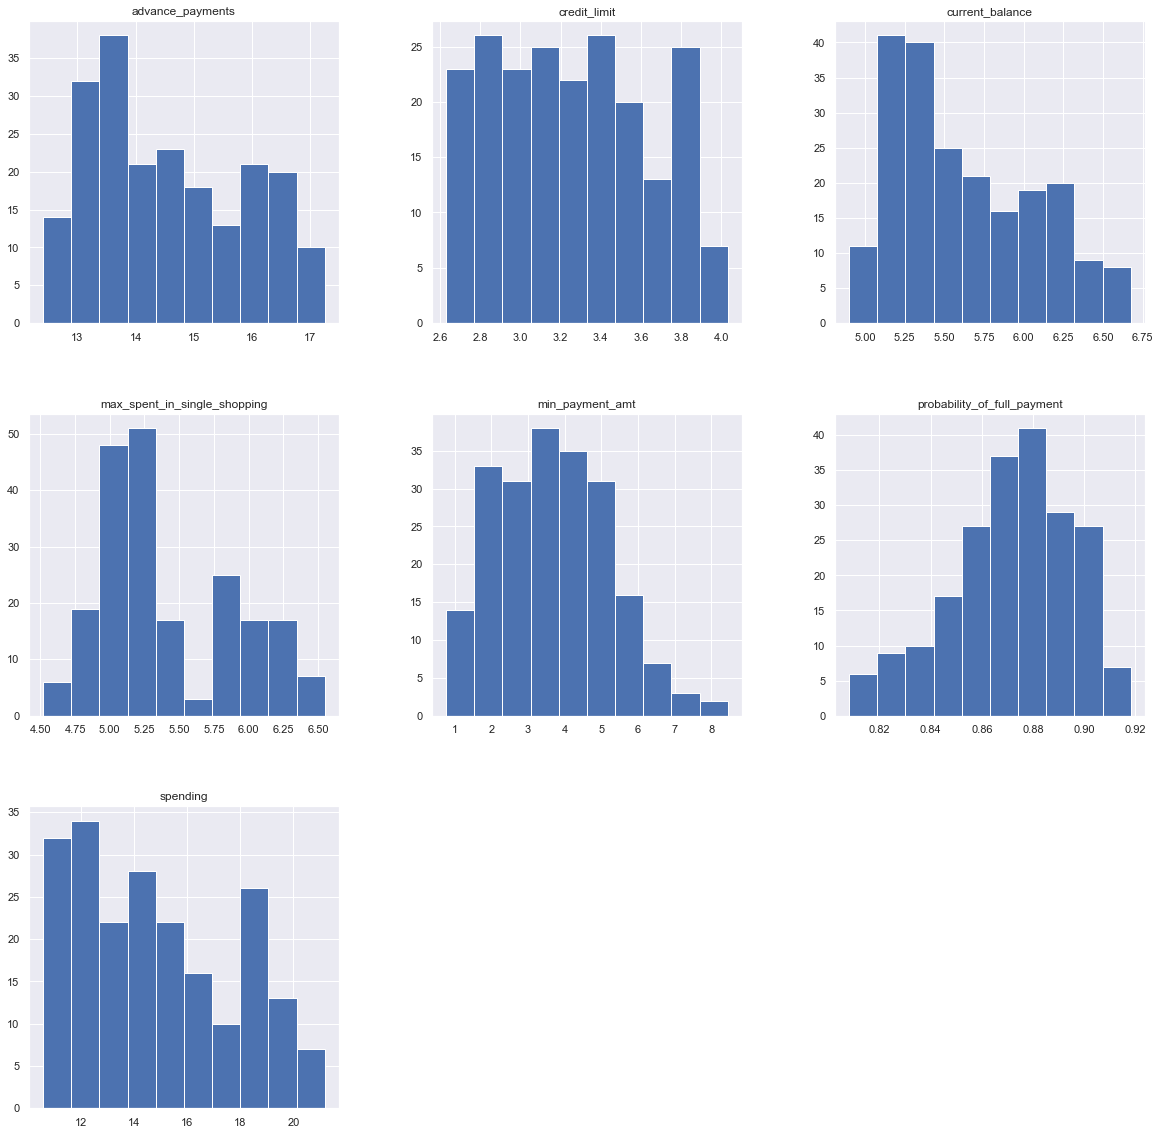

In [13]:
rcParams['figure.figsize'] = 20,20

df.hist();

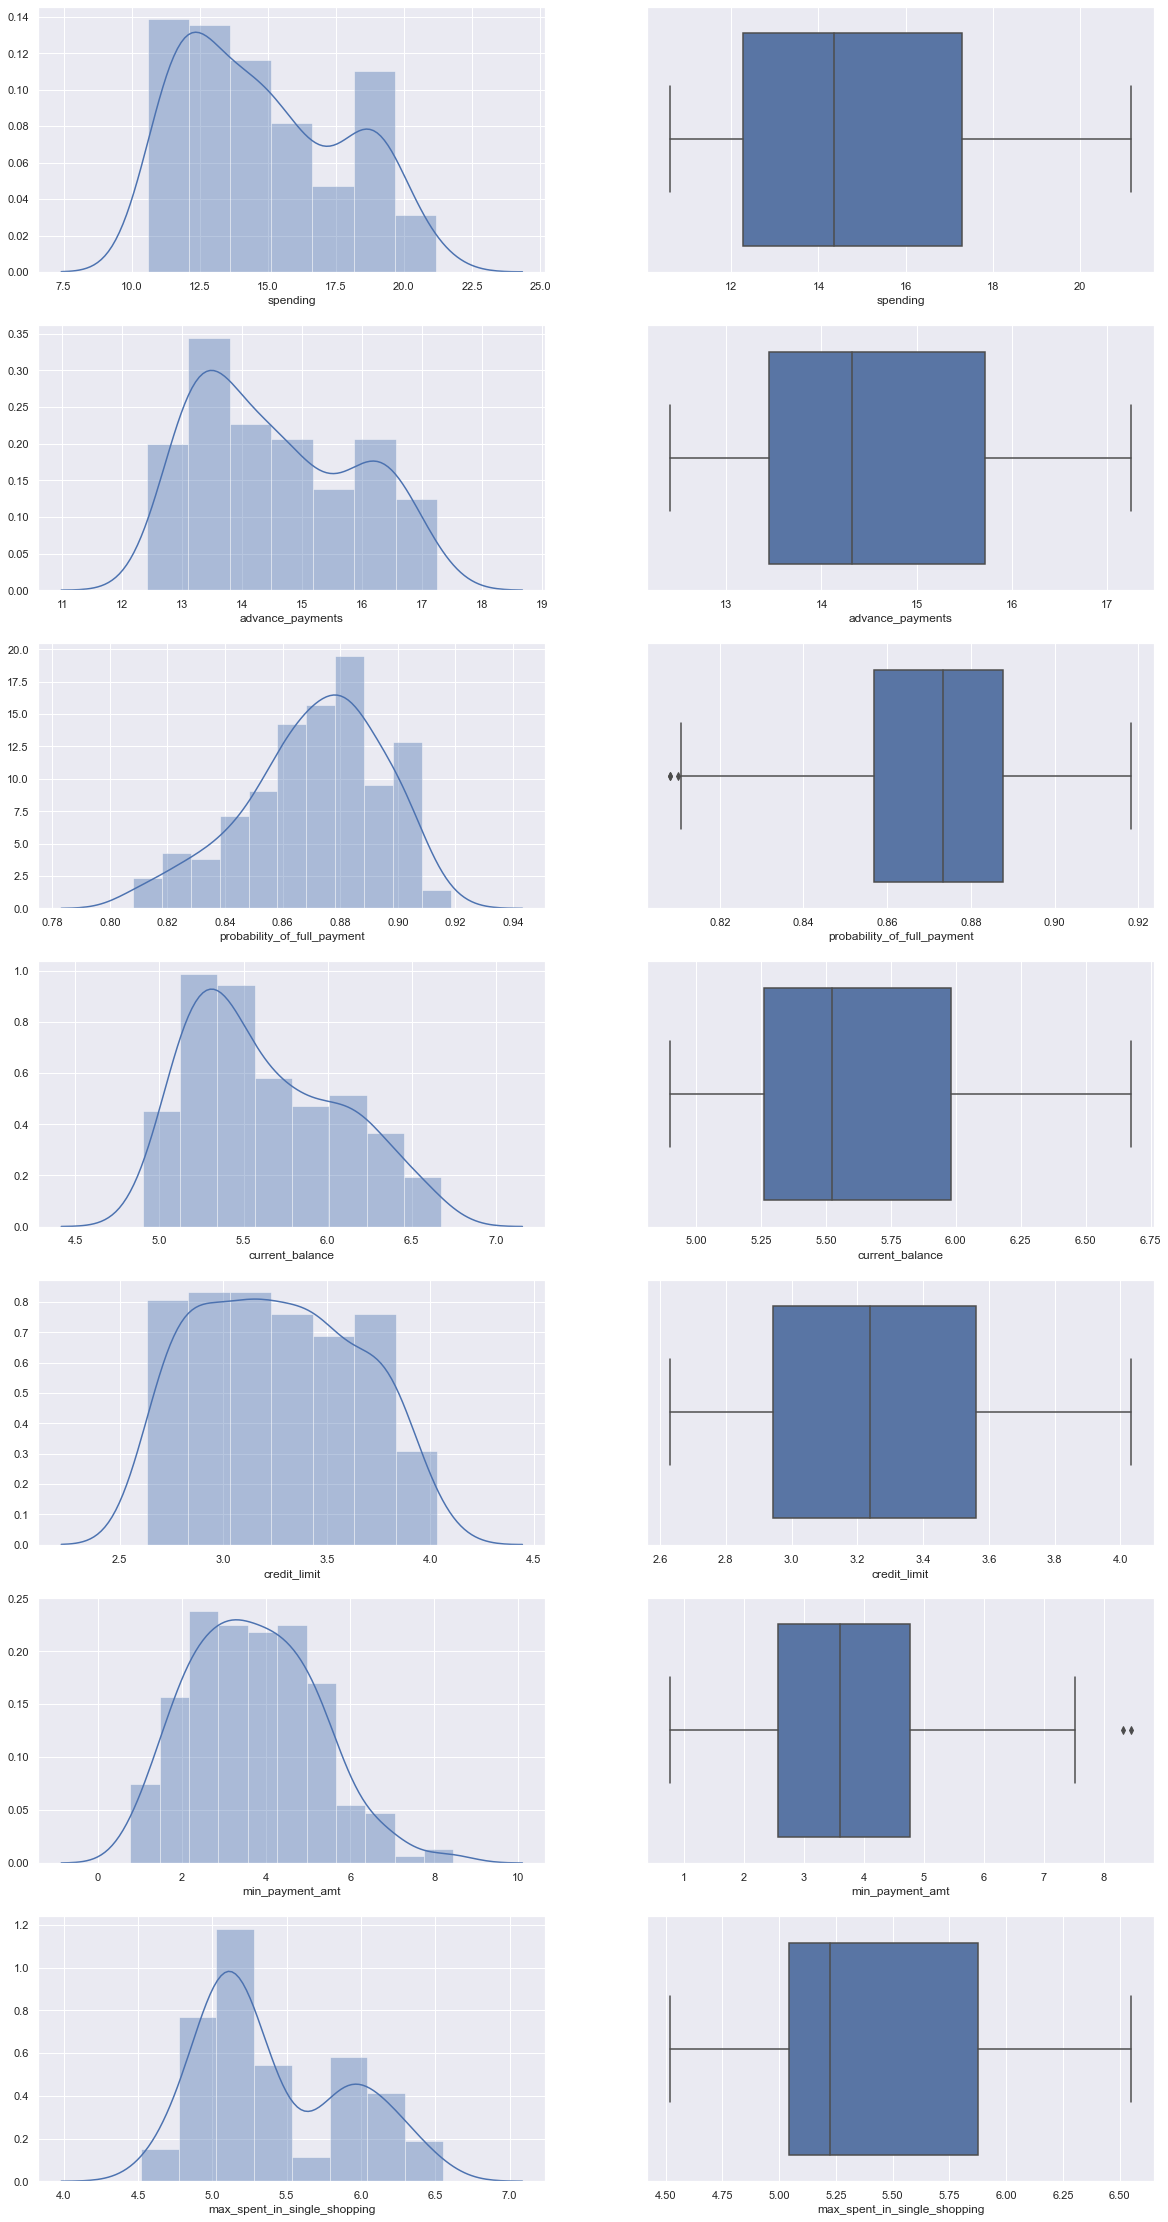

In [14]:
fig_dims = (20,40)
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=fig_dims)

for col, i in zip(df.columns,np.arange(12)):
    sns.distplot(df[col], ax=axs[i,0])
    sns.boxplot(df[col], ax=axs[i,1])

## 2)  Do you think scaling is necessary for clustering in this case? Justify

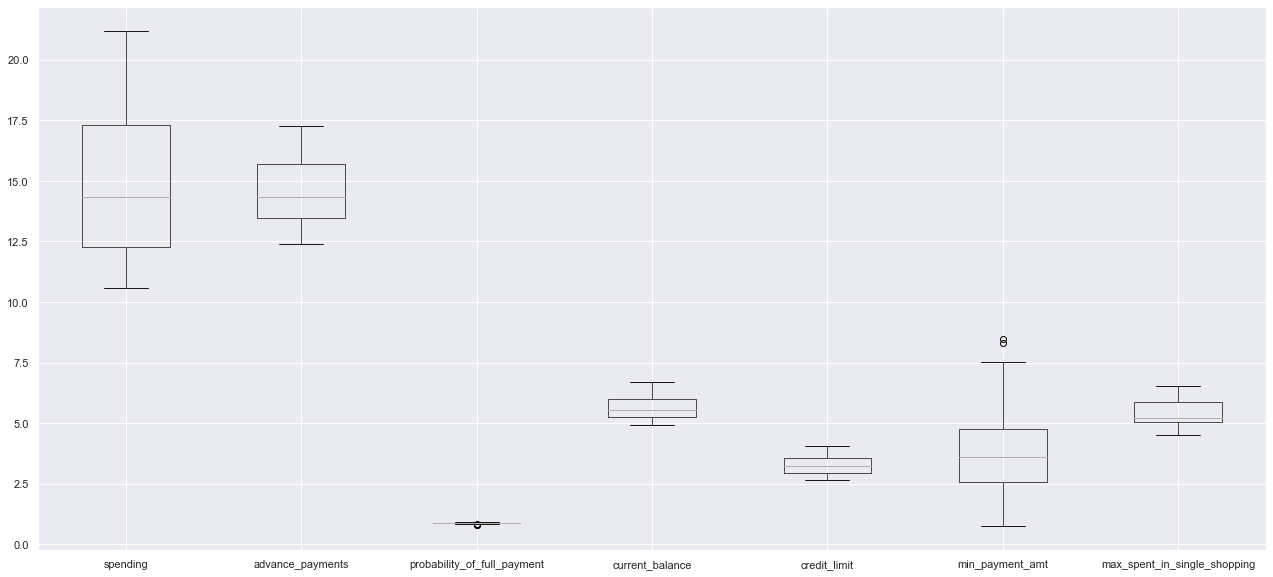

In [15]:
plt.figure(figsize=(22,10))
df.boxplot();

Post viewing the data it was identified that Variables like Spending, Current balance & max spent in single shopping are in 1000’s. Whereas the Variables like Advance payments & Min payment amt & are in 100’s, Credit limit Variable is in 10000’s. Since all the variables are not on the same scale. We need to Scale the data.

In [16]:
from scipy.stats import zscore

In this step we are importing the Standard Scaler function to scale the data (Computing Z Scores) StandardScaler scales the data by subtracting the observation from the mean of the variable and dividing it by the standard deviation of the variable.

# z = $\frac{(x - \mu)}{\sigma}$

###### Note: All the symbols follow the usual nomeclature.

In [17]:
data_scaled = df.apply(zscore)
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


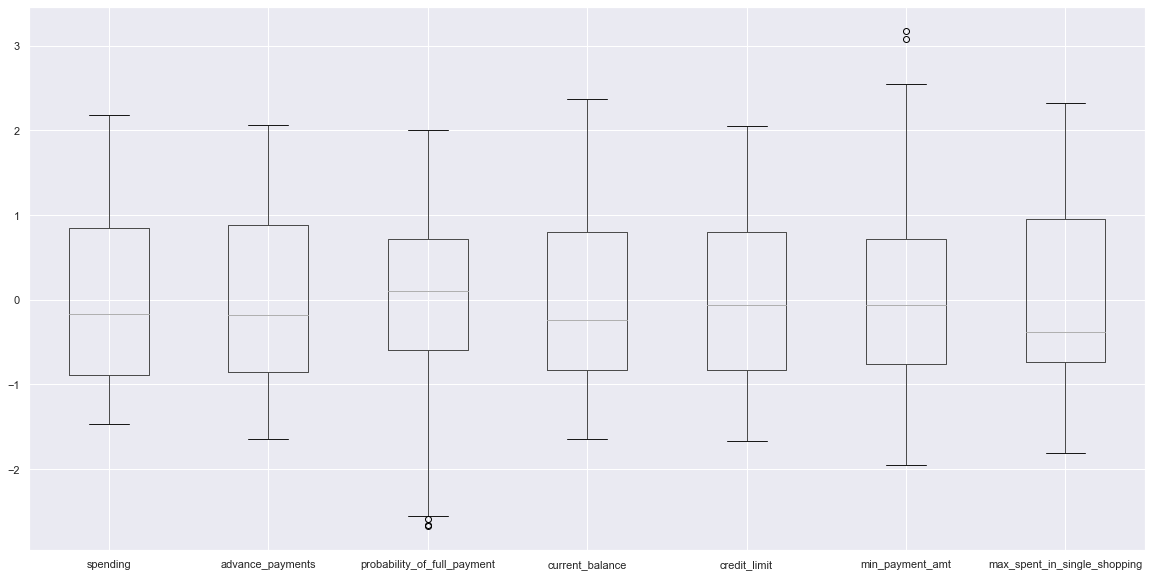

In [18]:
plt.figure(figsize=(20,10))
data_scaled.boxplot();

This is how the scaled data looks like. when all the variables are on the same scale.

## 3) Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

# Hierarchical Clustering

In Clustering, we try to group the variables which are similar to each other. We measure the similarities with respect to distance measures.

#### Method 1: Performing Hierarchical Clustering with the 'scipy' package 

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

Let us now try to cluster the data with the Euclidean distance and Ward's method for linkage.

In [20]:
wardlink = linkage(data_scaled,method = 'ward',metric='euclidean')

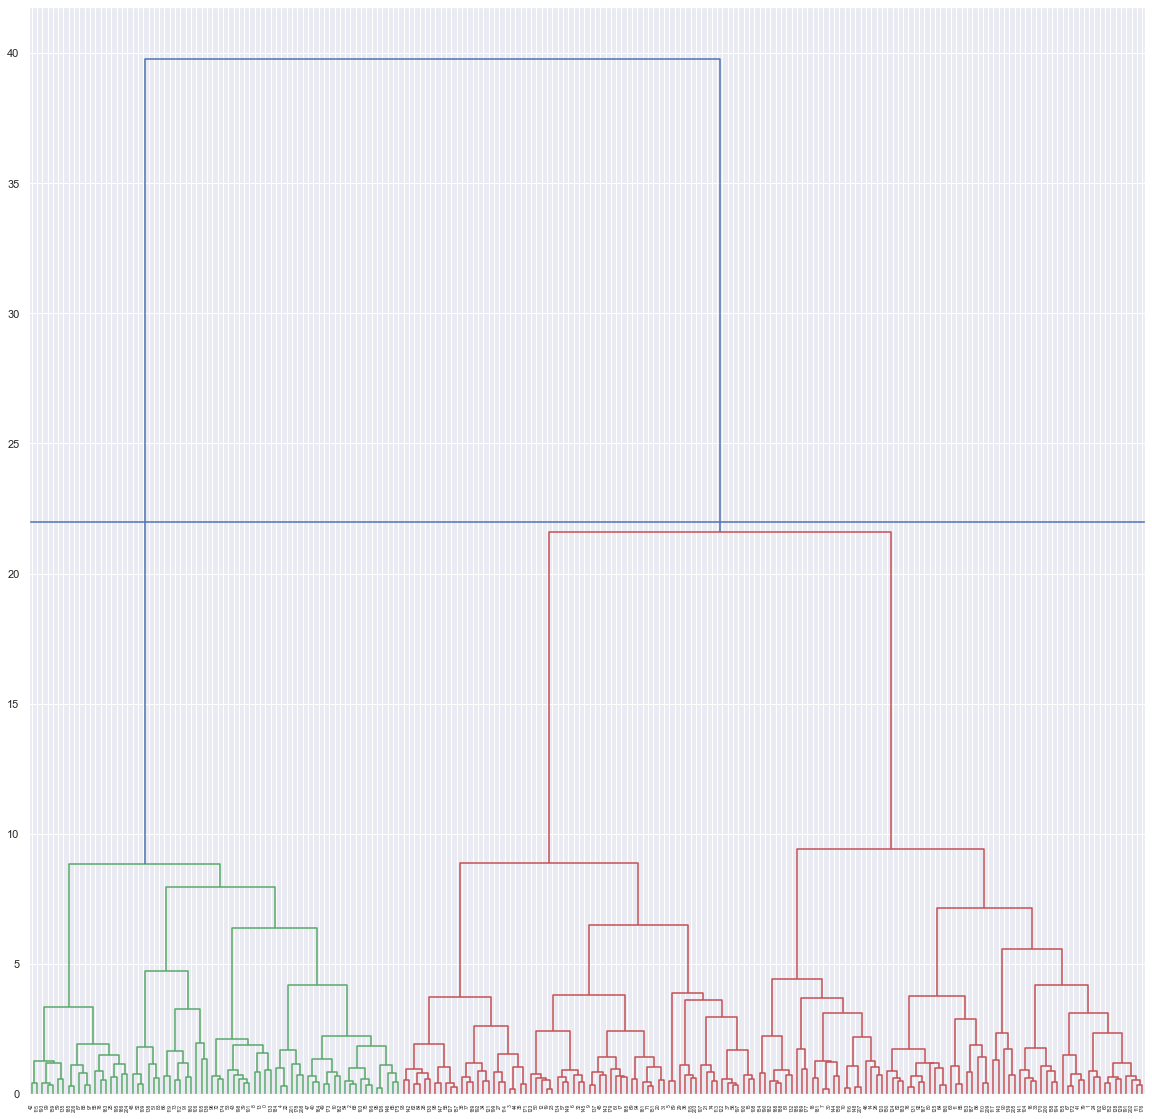

In [21]:
warddend = dendrogram(wardlink)
plt.axhline(22)

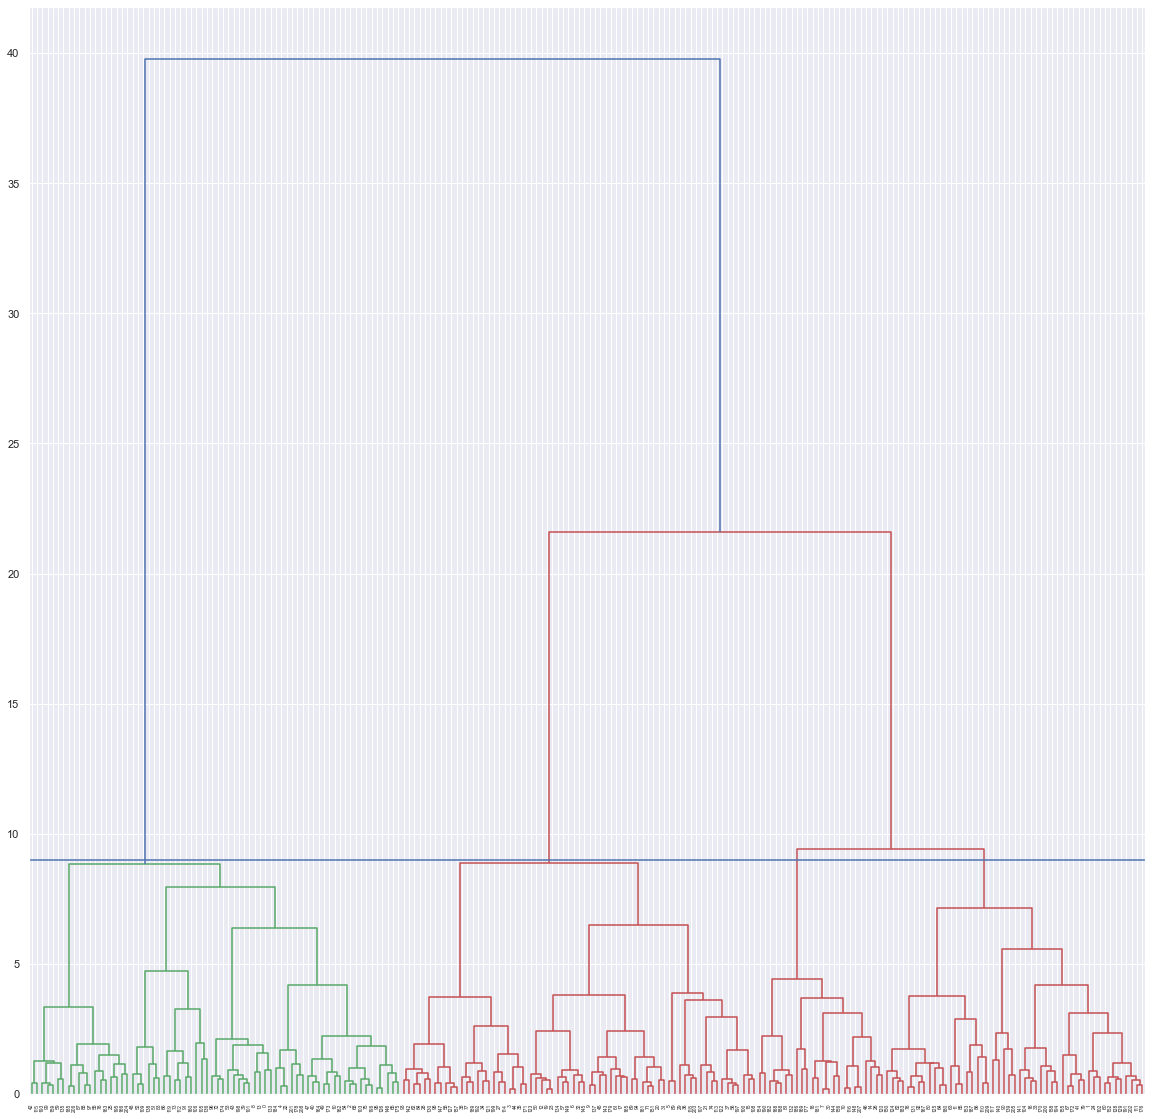

In [22]:
warddend = dendrogram(wardlink)
plt.axhline(9)

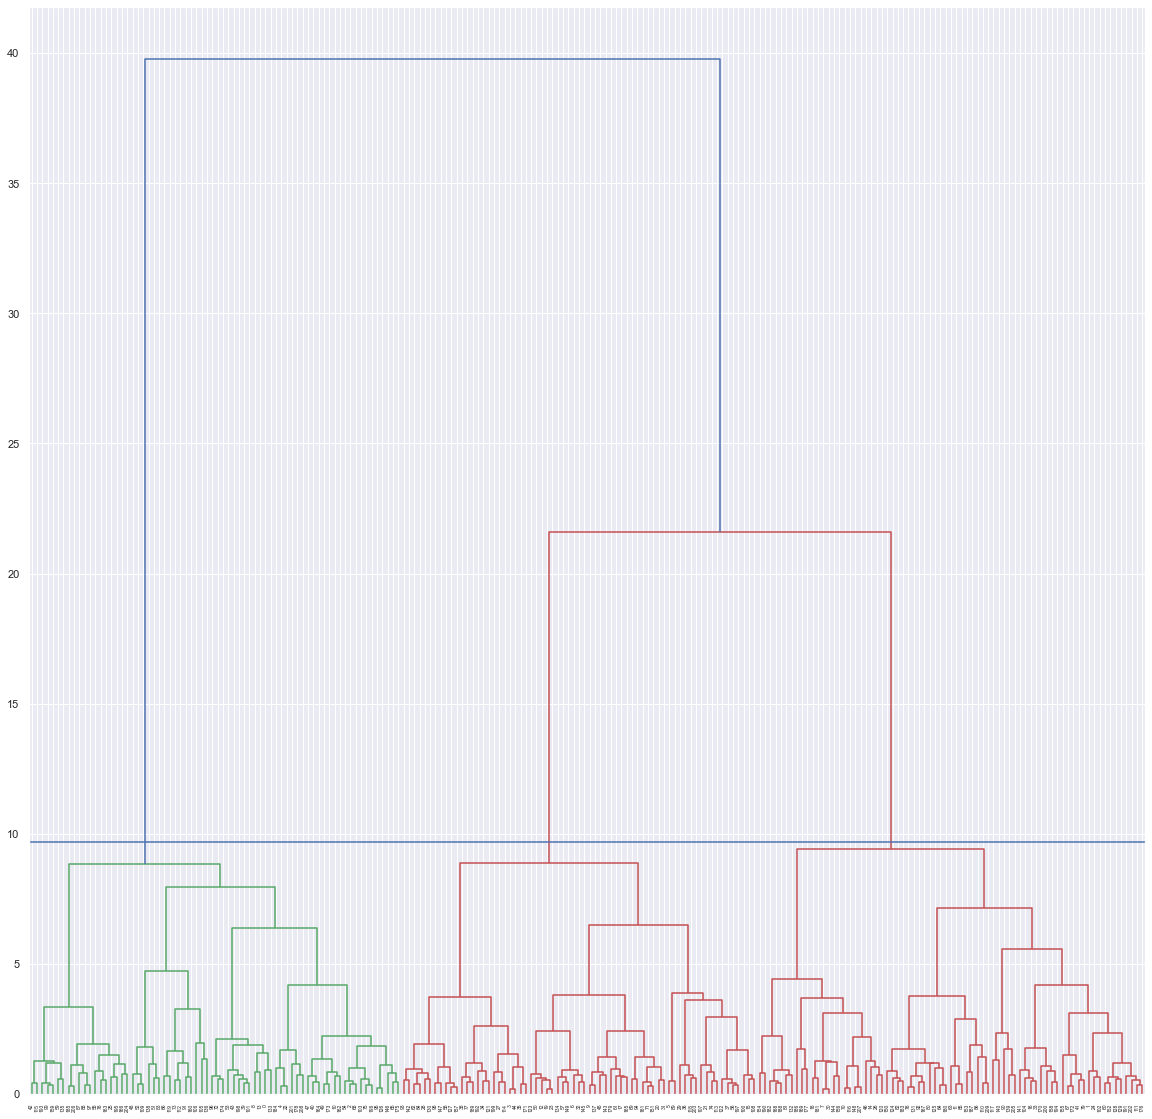

In [23]:
warddend = dendrogram(wardlink)
plt.axhline(9.7)

Now that we have visualized the number of clusters, we need to cluster the data according to their similarity metrics.


In [24]:
from scipy.cluster.hierarchy import fcluster

The above library helps us to extract the cluster numbers by looking at the dendrogram.

From the dendrogram, we see that 3 clusters are optimum. Thus, we are going to form 3 clusters based on the 'Distance' criterion in the fcluster package.

In [25]:
clusters = fcluster(wardlink, 9.8, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

Let us now go ahead and attach these clusters with the original dataframe and try to interpet it from a business perspective.

In [26]:
df['clusters'] = clusters

In [27]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


We will try to profile the clusters with the mean of the spending on each category. This will give us an idea about the various clusters thus built.

In [28]:
df_clust = df.groupby('clusters').mean()
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [29]:
df_clust = df_clust.reset_index()
df_clust

,clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [30]:
cluster_freq = df['clusters'].value_counts().sort_index()
cluster_freq

1    70
2    67
3    73
Name: clusters, dtype: int64

From the above data frame, we know the frequency of the occurence of each clusters

In [31]:
df_clust['Frequency'] = cluster_freq.values
df_clust

,clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


From the above data frame, we know the frequency of the occurence of each clusters.

## 4) Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In K-Means Clustering we have to choose the value of 'K' very accurately by looking at the Within Sum of Squares (WSS).

Since we have already scaled the data above, let us go ahead and perform the K-Means Clustering.

    Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).


The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.

Let us now check the WSS for 2 clusters.

In [32]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

659.1717544870407

Let us now check the WSS for 3 clusters.

In [33]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

430.65897315130053

In [34]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

Let us now check the WSS for 4 clusters.

In [35]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

371.1846125351019

Now, we see that the WSS is decreasing. But it is very cumbersome to manually compute for each value. So, we are going to pass the KMeans function through a loop to automate this process of manually calculating the 'inertia'.

Let us define an empty list to being the process of automating the calculation of 'inertia'.

In [36]:
wss = []
for i in range(1,11):
    km_model = KMeans(n_clusters= i )
    km_model.fit(data_scaled)
    wss.append(km_model.inertia_)
 

Now, let us print 'wss' and check the values.

In [37]:
for i in range(2,9):
    print('The wss value for',i,'clusters is',wss[i-2])

The wss value for 2 clusters is 1470.0
The wss value for 3 clusters is 659.1717544870407
The wss value for 4 clusters is 430.65897315130053
The wss value for 5 clusters is 371.2834476674334
The wss value for 6 clusters is 328.180247142173
The wss value for 7 clusters is 289.2157378113418
The wss value for 8 clusters is 262.8373166735822


There are some other techniques from which can be used to find the approximate or optimal value of k.

# Elbow method -

## It is most popular and well-known method to find the optimal no. of clusters or the value of k in the process of clustering.This method is based of plotting the value of cost function against different values of k. As the number of clusters (k) increase lesser number of points fall within clusters or around the centroids.Hence the average distortion decreases with the increase of number of clusters. The point where the distortion declines most is said to be the elbow pointand define the optimal number of clusters for dataset.

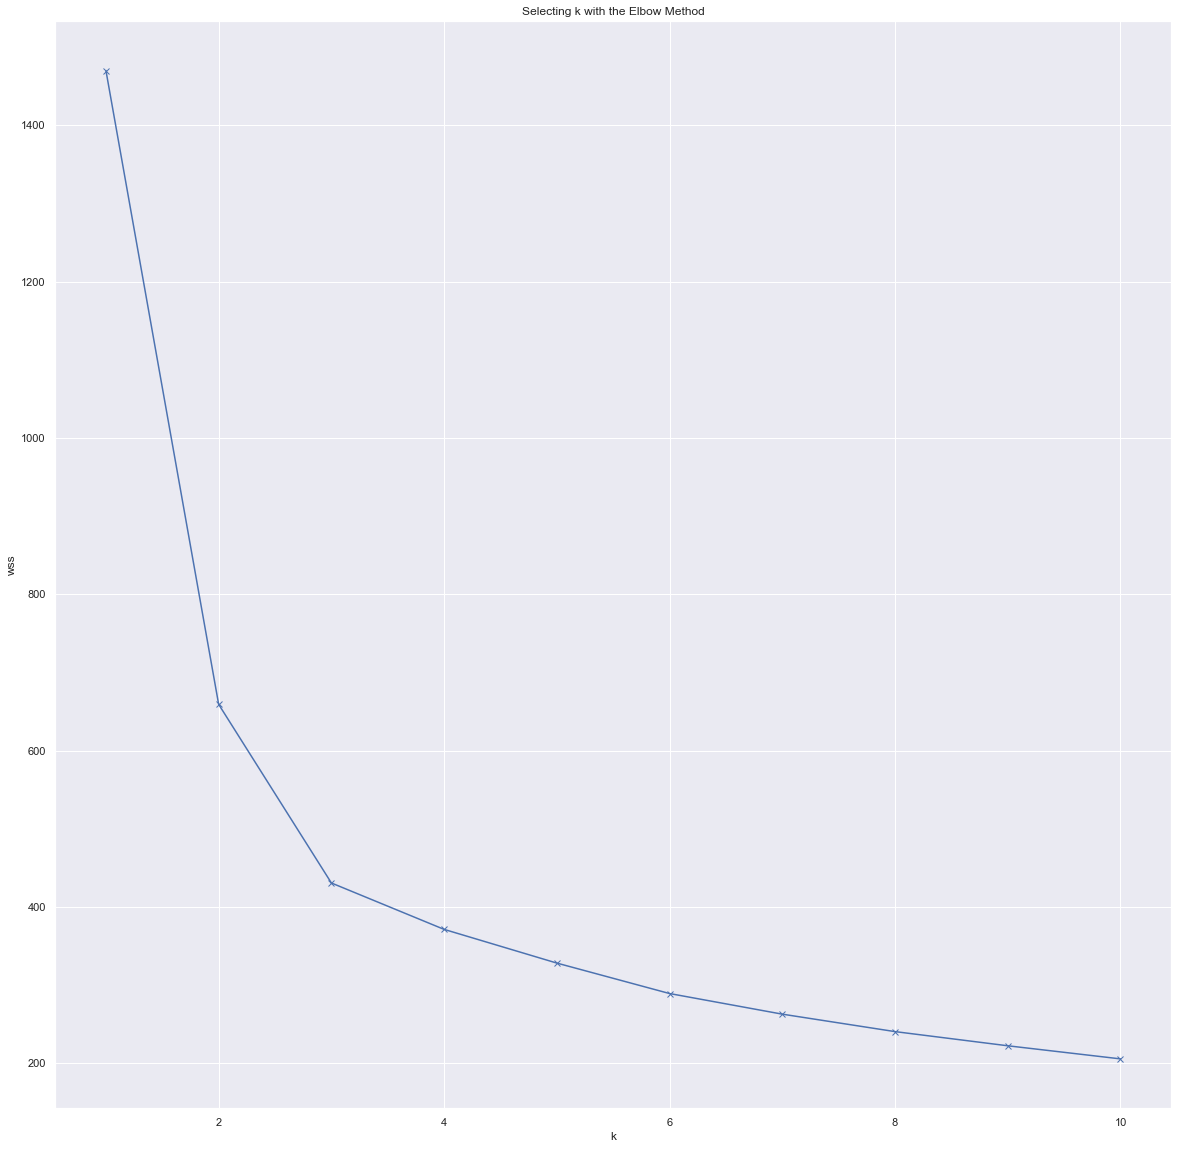

In [38]:
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Selecting k with the Elbow Method');

The ideal 'WSS' plot has to have a sharp elbow like structure. The number of clusters corresponding to that elbow-like graph is considered to be the most optimum.

As it is clear from above figure, the distortion declines most at 3. Hence the optimal value of k will be 3 for performing the clustering. In other words the plot looks as an arm with anelbow at k = 3.



Having said that, here we will go for 3 clusters.

Let us now store the values of the clusters into a variable and we will attach the particular variable to the data set.

# Silhouette Method -

## Silhouette is a different method to determine optimal number of clusters for given dataset. It defines as a coefficient of measureof how similar anobservation to its own cluster compared to that of other clusters. The range of silhouette coefficient varies between -1 to 1.1 valueindicatethat anobservation is far from its neighbouringclusterand close to its own whereas-1 denotes that an observation isclose to neighbouring cluster than its own cluster. The 0 value indicate the presence of observation on boundary of two clusters

In [39]:
from sklearn.metrics import silhouette_score

In [40]:

for i in range(2,11):
    km_model = KMeans(n_clusters= i,random_state = 42)
    y=km_model.fit_predict(data_scaled)     
    s =silhouette_score(data_scaled, y)
    print("silhouette =",s, "for i=", i)   

silhouette = 0.46577247686580914 for i= 2
silhouette = 0.4007270552751299 for i= 3
silhouette = 0.3291966792017613 for i= 4
silhouette = 0.2865045701398138 for i= 5
silhouette = 0.29127768970444345 for i= 6
silhouette = 0.27393907672148887 for i= 7
silhouette = 0.25022538653640086 for i= 8
silhouette = 0.24491366410664225 for i= 9
silhouette = 0.2502746699759954 for i= 10


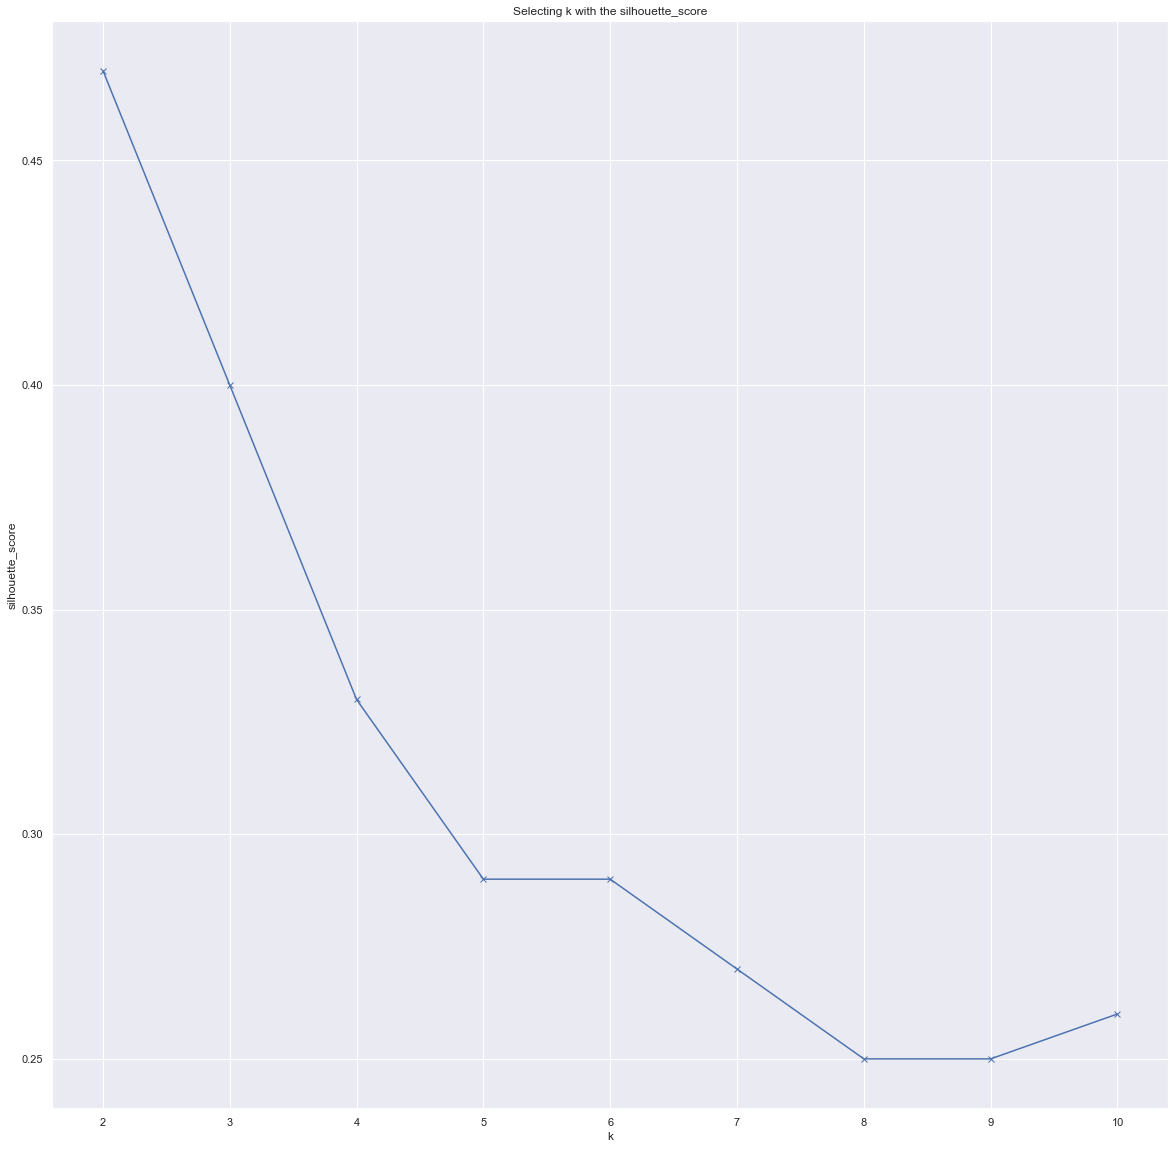

In [41]:
score = []
for i in range(2,11):
    km_model = KMeans(n_clusters= i )
    km_model.fit(data_scaled)
    score.append(round(silhouette_score(data_scaled, km_model.labels_),2))

plt.plot(range(2,11), score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Selecting k with the silhouette_score');

From above Silhouette Method it was identified that 0.46577247686580914 is highest Silhouette score for K=2. Wheras as per Elbow method the distortion declines most at 3. Hence we will go ahead with 3 clusters.

In [42]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
labels = k_means.labels_

In [43]:
df["Clus_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


In [44]:
df_clust = df.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
round(df_clust,0)

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,0,14.0,14.0,1.0,6.0,3.0,3.0,5.0,3.0
1,1,12.0,13.0,1.0,5.0,3.0,5.0,5.0,2.0
2,2,18.0,16.0,1.0,6.0,4.0,4.0,6.0,1.0


Let us check the frequency of the occurence of the clusters for each individual cluster.

In [45]:
cluster_freq = df['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0    71
1    72
2    67
Name: Clus_kmeans, dtype: int64

## 5) Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.¶

In [46]:
df_clust['Frequency'] = cluster_freq.values
round(df_clust,0)

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Frequency
0,0,14.0,14.0,1.0,6.0,3.0,3.0,5.0,3.0,71
1,1,12.0,13.0,1.0,5.0,3.0,5.0,5.0,2.0,72
2,2,18.0,16.0,1.0,6.0,4.0,4.0,6.0,1.0,67


Now, let us compare the different clusters with the average values and try to interpret the problem.

### Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### Silhouette Width / Silhouette Sample
the silhouette width is also an estimate of the average distance between clusters. Its value is comprised between 1 and -1 with a value of 1 indicating a very good cluster.

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
silhouette_score(data_scaled,k_means.labels_)

0.4007270552751299

In [49]:
sil_width = silhouette_samples(data_scaled,labels)

In [50]:
df["sil_width"] = sil_width
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2,0.362276


In [51]:
silhouette_samples(data_scaled,labels).min()

0.002713089347678533

Since the smallest value of  silhouette width is 0.0271 this indicates that no observation or no custumer record that is incorrectly mapped to a cluster. All the silhoutte width scores are positive. Hence we can say that all the clusters are correctly mapped

In [52]:
df.to_csv('kmeans.csv')

In [53]:
round(df_clust,0).rename(index={0: "High Spenders", 1: "Mid Spenders", 2: "Low Spenders"})


,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Frequency
High Spenders,0,14.0,14.0,1.0,6.0,3.0,3.0,5.0,3.0,71
Mid Spenders,1,12.0,13.0,1.0,5.0,3.0,5.0,5.0,2.0,72
Low Spenders,2,18.0,16.0,1.0,6.0,4.0,4.0,6.0,1.0,67


Now, let us compare the different clusters with the average values and try to interpret the problem.

## High Spenders 
High spenders can be easily distinguished based on the high spending history. As they are highest spenders in the room the bank / Lending institution can offer luxurious and exclusive privileges and discounts with top dining, hotel and nightlife establishments. Other privileges like higher welcome miles bonuses, higher miles per dollar earn rates, special concierge services like airport limousine transfers, expedited immigration clearance, complimentary access to airport lounges and even complimentary hotel room stays as they are considered as high-income earners.

## Mid Spenders  
Basis data it was identified that in spite of being having the current balance equivalent to the High Spenders they have low credit limits. Financial institution can increase their Credit Limits and offer them offers based on giving them a target amount and if achieved given them Instant cash backs & Rewards on each penny spent. Also, they can give offers them EMI offers on purchase of online Electronics gadgets as it was also identified that They are the ones who do lower minimum payment. 

## Low Spenders 
Low Spenders are those who come under Middle Class. Who can be classified as low average spenders basis on their specific needs. As the they use credit cards for their specific needs like groceries purchases, Petrol pumps, Booking Movie Tickets, Booking Air Tickets. Lending Institution can give they offers on groceries purchases, Petrol pumps, Booking Movie Tickets, Booking Air Tickets, Online food Ordering Apps like Zomato, Swiggy, Food Panda, Faaso's, etc. Also in spite of having the credit limit same as Mid Spenders they are spending the lowest so giving ample offers for them would make sense. Also, data says that probability if full payment is 100%. 
As the data shows that they have done the highest advance payments & as they also have probability of full payment. 


## END